In [180]:
import pandas as pd
import numpy as np

df=pd.read_excel('movie_dataSet_2023.xlsx')
print(df)

                           movie   language               director  Action  \
0                          Jawan      Hindi                  Atlee       1   
1                        Pathaan      Hindi        Siddharth Anand       1   
2                         Animal      Hindi    Sandeep Reddy Vanga       1   
3                        Gadar 2      Hindi            Anil Sharma       1   
4    Salaar: Cease Fire - Part 1     Telugu         Prashanth Neel       1   
..                           ...        ...                    ...     ...   
133                    Runway 34      Hindi             Ajay Devgn       0   
134    Vendhu Thanindhathu Kaadu      Tamil  Gautham Vasudev Menon       1   
135                 Malikappuram  Malayalam    Vishnu Sasi Shankar       1   
136   Rocketry: The Nambi Effect      Tamil               Madhavan       0   
137               Jana Gana Mana  Malayalam       Dijo Jose Antony       0   

     Drama  Musical  Adventure  Thriller  Crime  Comedy  ...  A

In [181]:
x=df.iloc[:,1:27].values
y=df.iloc[:,-1].values



In [182]:

print(x)
print(y)


[['Hindi' 'Atlee' 1 ... 285 169 129.6]
 ['Hindi' 'Siddharth Anand' 1 ... 250 146 104.8]
 ['Hindi' 'Sandeep Reddy Vanga' 1 ... 140 204 115.9]
 ...
 ['Malayalam' 'Vishnu Sasi Shankar' 1 ... 10 121 36.1]
 ['Tamil' 'Madhavan' 0 ... 50 157 35.7]
 ['Malayalam' 'Dijo Jose Antony' 0 ... 15 162 27.1]]
['Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Flop' 'Hit' 'Hit'
 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit'
 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Flop' 'Hit' 'Hit' 'Flop' 'Hit'
 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Flop' 'Hit' 'Hit'
 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Flop' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit'
 'Flop' 'Hit' 'Flop' 'Hit' 'Hit' 'Flop' 'Flop' 'Flop' 'Hit' 'Hit' 'Flop'
 'Flop' 'Flop' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Flop' 'Hit' 'Hit' 'Flop'
 'Hit' 'Flop' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Hit' 'Hit'
 'Hit' 'Hit' 'Flop' 'Hit' 'Flop' 'Flop' 'Flop' 'Flop' 'Flop' 'Flop' 'Flop'
 'Hit' 'Hit' 'Hit' 'Flop' 'Flop' 'Flop' 'Flop' '

In [183]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x[:,0]=le.fit_transform(x[:,0])
x[:,1]=le.fit_transform(x[:,1])
x[:,19]=le.fit_transform(x[:,19])
x[:,20]=le.fit_transform(x[:,20])
x[:,21]=le.fit_transform(x[:,21])
x[:,22]=le.fit_transform(x[:,22])

y = le.fit_transform(y)




In [184]:
print(x)

[[1 18 1 ... 285 169 129.6]
 [1 108 1 ... 250 146 104.8]
 [1 102 1 ... 140 204 115.9]
 ...
 [3 127 1 ... 10 121 36.1]
 [6 60 0 ... 50 157 35.7]
 [3 28 0 ... 15 162 27.1]]


In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=10)

In [186]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier


# Initialize KNeighborsClassifier with weighted distances
dt = KNeighborsClassifier(n_neighbors=5, metric='correlation')



In [187]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)


In [188]:
#performance metrics

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(precision_score(y_test,y_pred, average='binary'))

0.8214285714285714
[[13  4]
 [ 6 33]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.89      0.85      0.87        39

    accuracy                           0.82        56
   macro avg       0.79      0.81      0.80        56
weighted avg       0.83      0.82      0.82        56

0.8918918918918919


In [194]:
from sklearn.metrics import auc,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder


# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)



0.8054298642533937


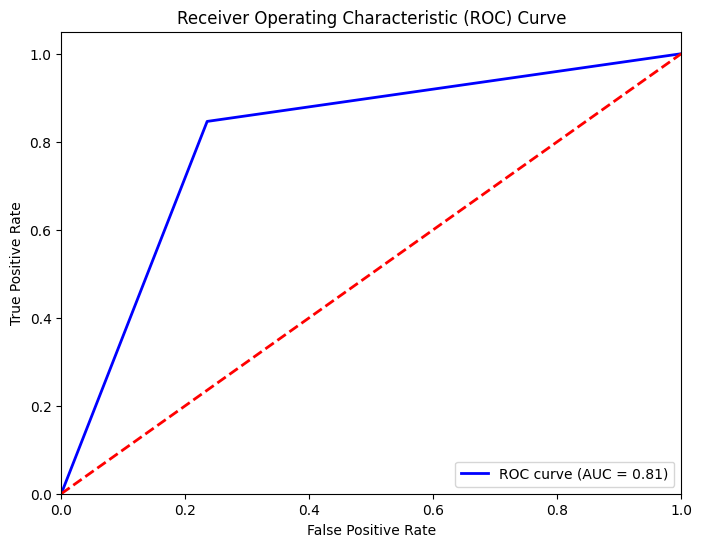

In [195]:
import matplotlib.pyplot as plt


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
